<a href="https://colab.research.google.com/github/Infernomerc/Alfido-tech/blob/main/Alfido_tech_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/zomato.csv')

# Preview the first few rows
df.head()


,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


Data cleaning

In [ ]:


# 1. Clean the 'rate' column
# Convert 'rate' to string to safely apply string operations
df['rate'] = df['rate'].astype(str)

# Replace 'NEW' and '-' with None and extract only numeric values
df['rate'] = df['rate'].replace({'NEW': None, '-': None})  # Replace non-ratings
df['rate'] = df['rate'].str.extract(r'(\d+\.?\d*)')  # Extract numeric ratings
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')  # Convert to float, setting non-numeric to NaN

# 2. Clean the 'approx_cost(for two people)' column
# Remove commas from the cost column and handle non-numeric values
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '')  # Remove commas
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')  # Convert to float, setting non-numeric to NaN

# 3. Handle missing values
# Drop rows where critical fields like 'name', 'location', and 'cuisines' are missing
df = df.dropna(subset=['name', 'location', 'cuisines'])

# 4. Remove Outliers from the 'approx_cost(for two people)' column using IQR
Q1 = df['approx_cost(for two people)'].quantile(0.25)
Q3 = df['approx_cost(for two people)'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['approx_cost(for two people)'] < (Q1 - 1.5 * IQR)) | (df['approx_cost(for two people)'] > (Q3 + 1.5 * IQR)))]

df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet


Descriptive statistics

In [ ]:
df.describe()


,rate,approx_cost(for two people)
count,38268.000000,46076.000000
mean,5.096306,437.435433
std,68.611698,219.597887
min,0.000000,40.000000
25%,3.400000,300.000000
50%,3.700000,400.000000
75%,4.000000,600.000000
max,8335.000000,1050.000000


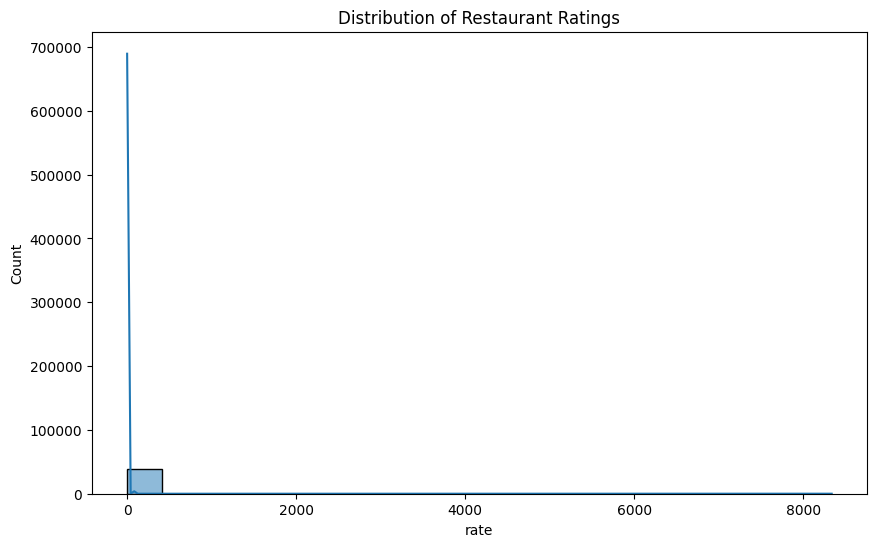

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['rate'].dropna(), bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.show()


Bar Chart

<ipython-input-15-a7dacc92d596>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cost_cuisine.values, y=avg_cost_cuisine.index, palette='viridis')


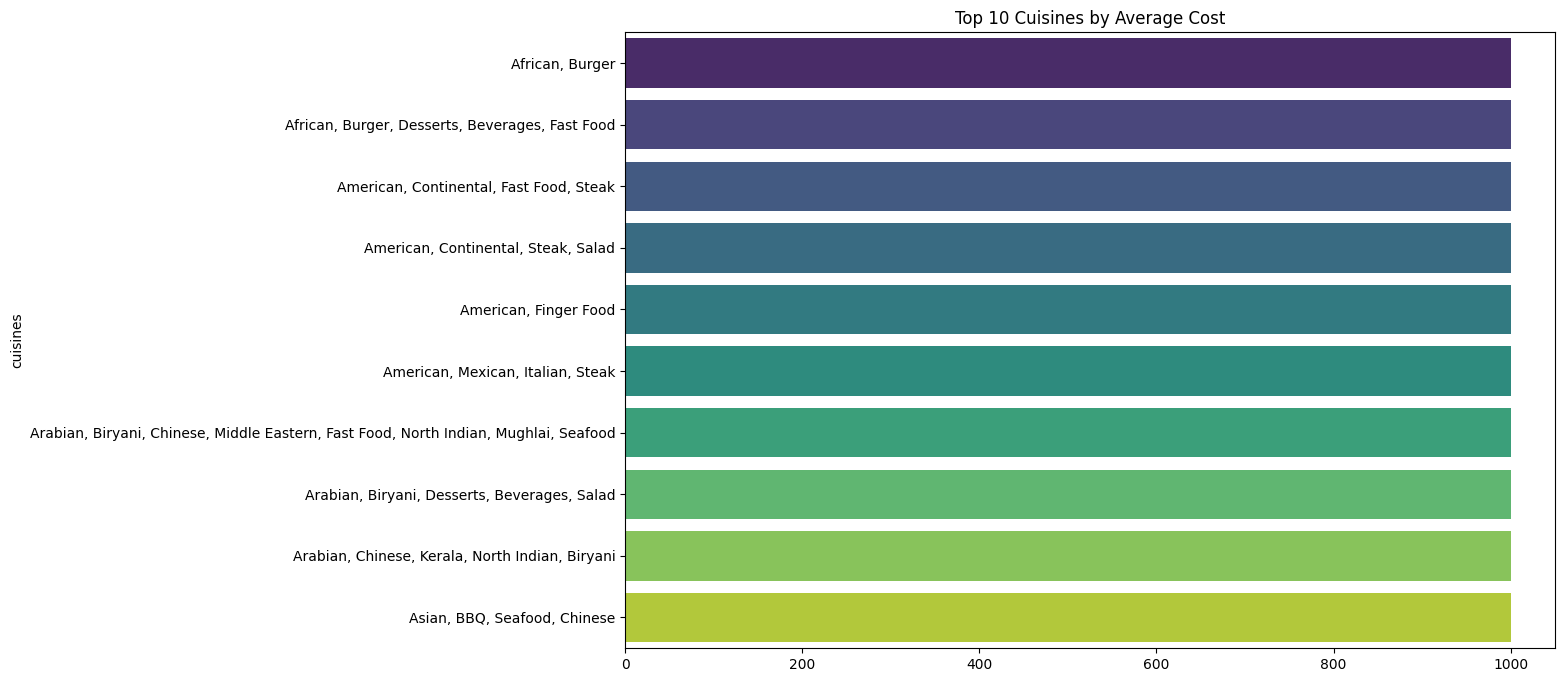

In [ ]:
avg_cost_cuisine = df.groupby('cuisines')['approx_cost(for two people)'].mean().nlargest(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_cost_cuisine.values, y=avg_cost_cuisine.index, palette='viridis')
plt.title('Top 10 Cuisines by Average Cost')
plt.show()


Scatter plot

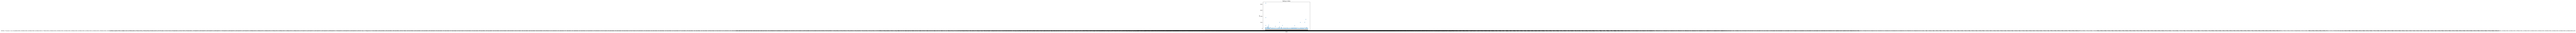

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='votes', y='rate', data=df)
plt.title('Rating vs Votes')
plt.show()
